Data downloaded from https://www.kaggle.com/c/fake-news/data?select=test.csv

train.csv: A full training dataset with the following attributes:

    id: unique id for a news article
    title: the title of a news article
    author: author of the news article
    text: the text of the article; could be incomplete
    label: a label that marks the article as potentially unreliable
        1: unreliable
        0: reliable


In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [263]:
fake = pd.read_csv('news/Fake.csv')
true = pd.read_csv('news/True.csv')

In [264]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [265]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [266]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [267]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


### Cleaning

In [268]:
#track fake vs true news
true['target'] = 'true'
fake['target'] = 'false'

In [269]:
#Combine both dataframes
df_combined = pd.concat([true, fake])
df_combined.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [270]:
df_combined.target.value_counts()

false    23481
true     21417
Name: target, dtype: int64

In [271]:
df_combined['total_text'] = df_combined['title'] + ' ' + df_combined['text']

In [272]:
#Search for null values
df_combined[df_combined['total_text'].isnull()]

,title,text,subject,date,target,total_text


In [273]:
#Remove columns that won't be used
df_combined = df_combined.drop(['title', 'text', 'date'], axis = 1)
df_combined.head()

,subject,target,total_text
0,politicsNews,true,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,true,U.S. military to accept transgender recruits o...
2,politicsNews,true,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politicsNews,true,FBI Russia probe helped by Australian diplomat...
4,politicsNews,true,Trump wants Postal Service to charge 'much mor...


In [274]:
# Convert all but U.S to lowercase

specialwords = ['U.S.']

toLower = lambda x: " ".join( a if a in specialwords else a.lower() for a in x.split() )
                             
df_combined['total_text'] = df_combined['total_text'].apply(toLower)

In [275]:
df_combined.head()

,subject,target,total_text
0,politicsNews,true,"as U.S. budget fight looms, republicans flip t..."
1,politicsNews,true,U.S. military to accept transgender recruits o...
2,politicsNews,true,senior U.S. republican senator: 'let mr. muell...
3,politicsNews,true,fbi russia probe helped by australian diplomat...
4,politicsNews,true,trump wants postal service to charge 'much mor...


In [276]:
# Remove punctuation
df_combined['total_text'] = df_combined['total_text'].str.replace('[^\w\s]','')
df_combined

,subject,target,total_text
0,politicsNews,true,as US budget fight looms republicans flip thei...
1,politicsNews,true,US military to accept transgender recruits on ...
2,politicsNews,true,senior US republican senator let mr mueller do...
3,politicsNews,true,fbi russia probe helped by australian diplomat...
4,politicsNews,true,trump wants postal service to charge much more...
...,...,...,...
23476,Middle-east,false,mcpain john mccain furious that iran treated u...
23477,Middle-east,false,justice yahoo settles email privacy classactio...
23478,Middle-east,false,sunnistan us and allied safe zone plan to take...
23479,Middle-east,false,how to blow 700 million al jazeera america fin...


In [277]:
#Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_combined['total_text'] = df_combined['total_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [278]:
df_combined.head(20)

,subject,target,total_text
0,politicsNews,true,US budget fight looms republicans flip fiscal ...
1,politicsNews,true,US military accept transgender recruits monday...
2,politicsNews,true,senior US republican senator let mr mueller jo...
3,politicsNews,true,fbi russia probe helped australian diplomat ti...
4,politicsNews,true,trump wants postal service charge much amazon ...
5,politicsNews,true,white house congress prepare talks spending im...
6,politicsNews,true,trump says russia probe fair timeline unclear ...
7,politicsNews,true,factbox trump twitter dec 29 approval rating a...
8,politicsNews,true,trump twitter dec 28 global warming following ...
9,politicsNews,true,alabama official certify senatorelect jones to...


In [279]:
#Tokenize total text column
from nltk import tokenize
nltk.download('punkt')
from nltk.tokenize import WhitespaceTokenizer

df_combined['tokens'] = df_combined['total_text'].apply(nltk.WhitespaceTokenizer().tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [280]:
df_combined.head()

,subject,target,total_text,tokens
0,politicsNews,true,US budget fight looms republicans flip fiscal ...,"[US, budget, fight, looms, republicans, flip, ..."
1,politicsNews,true,US military accept transgender recruits monday...,"[US, military, accept, transgender, recruits, ..."
2,politicsNews,true,senior US republican senator let mr mueller jo...,"[senior, US, republican, senator, let, mr, mue..."
3,politicsNews,true,fbi russia probe helped australian diplomat ti...,"[fbi, russia, probe, helped, australian, diplo..."
4,politicsNews,true,trump wants postal service charge much amazon ...,"[trump, wants, postal, service, charge, much, ..."


In [281]:
#Lemmatize text
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

df_combined['tokens'] = df_combined['tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [282]:
#'us' is not being lemmatized properly
print(lemmatizer.lemmatize('us'))

u


In [283]:
#replace 'u' with 'us'
import re

df_combined['tokens'] = [[re.sub(r'\bu\b', 'us', item) for item in sub_list] for sub_list in df_combined['tokens']]

In [284]:
df_combined.query('target == "false"').head(20)

,subject,target,total_text,tokens
0,News,false,donald trump sends embarrassing new years eve ...,"[donald, trump, sends, embarrassing, new, year..."
1,News,false,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus..."
2,News,false,sheriff david clarke becomes internet joke thr...,"[sheriff, david, clarke, becomes, internet, jo..."
3,News,false,trump obsessed even obamas name coded website ...,"[trump, obsessed, even, obamas, name, coded, w..."
4,News,false,pope francis called donald trump christmas spe...,"[pope, francis, called, donald, trump, christm..."
5,News,false,racist alabama cops brutalize black boy handcu...,"[racist, alabama, cop, brutalize, black, boy, ..."
6,News,false,fresh golf course trump lashes fbi deputy dire...,"[fresh, golf, course, trump, lash, fbi, deputy..."
7,News,false,trump said insanely racist stuff inside oval o...,"[trump, said, insanely, racist, stuff, inside,..."
8,News,false,former cia director slams trump un bullying op...,"[former, cia, director, slam, trump, un, bully..."
9,News,false,watch brandnew protrump ad features much kissi...,"[watch, brandnew, protrump, ad, feature, much,..."


In [285]:
#Find most common words in true news
from itertools import chain
from collections import Counter

true = df_combined.query('target == "true"')

true_words = true['tokens']

true_word_counts = Counter(chain.from_iterable(true_words)).most_common(20)
true_word_counts

[('said', 99053),
 ('trump', 59768),
 ('US', 42143),
 ('state', 37190),
 ('would', 31750),
 ('reuters', 28464),
 ('president', 27500),
 ('republican', 23082),
 ('government', 19878),
 ('year', 18967),
 ('house', 18380),
 ('new', 17661),
 ('also', 15963),
 ('united', 15622),
 ('people', 15432),
 ('party', 15403),
 ('official', 15128),
 ('election', 14535),
 ('told', 14285),
 ('country', 14163)]

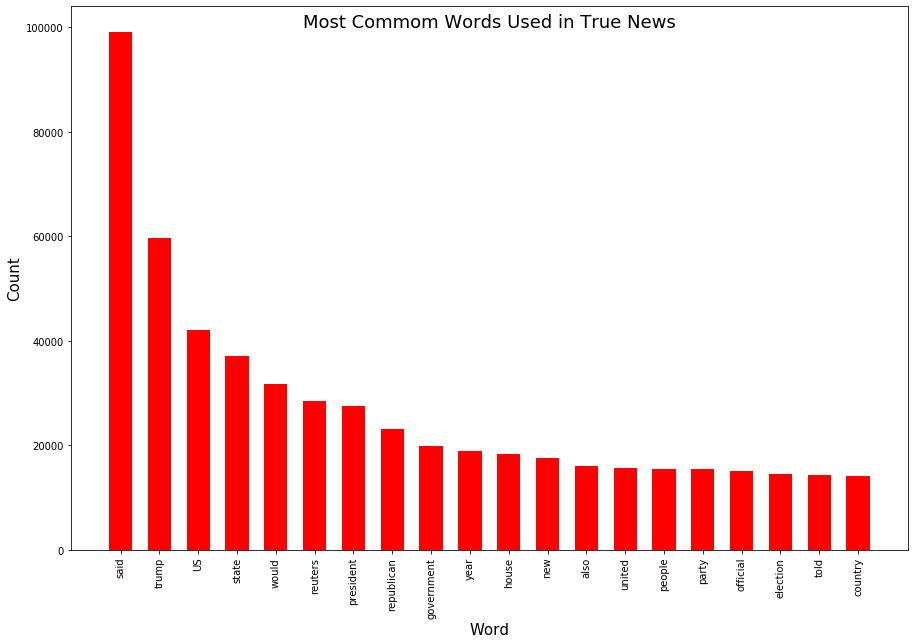

In [286]:
#plot most common words in true news
names, values = zip(*true_word_counts) 
# names = [x[0] for x in true_word_counts]
# values = [x[1] for x in true_word_counts]   

ind = np.arange(len(true_word_counts))  # the x locations for the groups
width = 0.6      # the width of the bars

fig, ax = plt.subplots(figsize = (15,10))
true_plot = ax.bar(ind, values, width, color='r', align='edge')

plt.title('Most Commom Words Used in True News', x=0.5, y=0.95, fontsize = 18)
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('Word', fontsize = 15)
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)
plt.xticks(rotation='vertical')
plt.show()

In [287]:
#Find most common words in false news
false = df_combined.query('target == "false"')

false_words = false['tokens']

false_word_counts = Counter(chain.from_iterable(false_words)).most_common(20)
false_word_counts

[('trump', 82423),
 ('said', 31199),
 ('president', 27172),
 ('people', 26529),
 ('one', 24273),
 ('would', 23672),
 ('state', 22523),
 ('clinton', 19731),
 ('obama', 19570),
 ('like', 18529),
 ('time', 18087),
 ('donald', 17940),
 ('video', 16939),
 ('republican', 16858),
 ('american', 16692),
 ('say', 16163),
 ('hillary', 15718),
 ('us', 15689),
 ('also', 15247),
 ('year', 15066)]

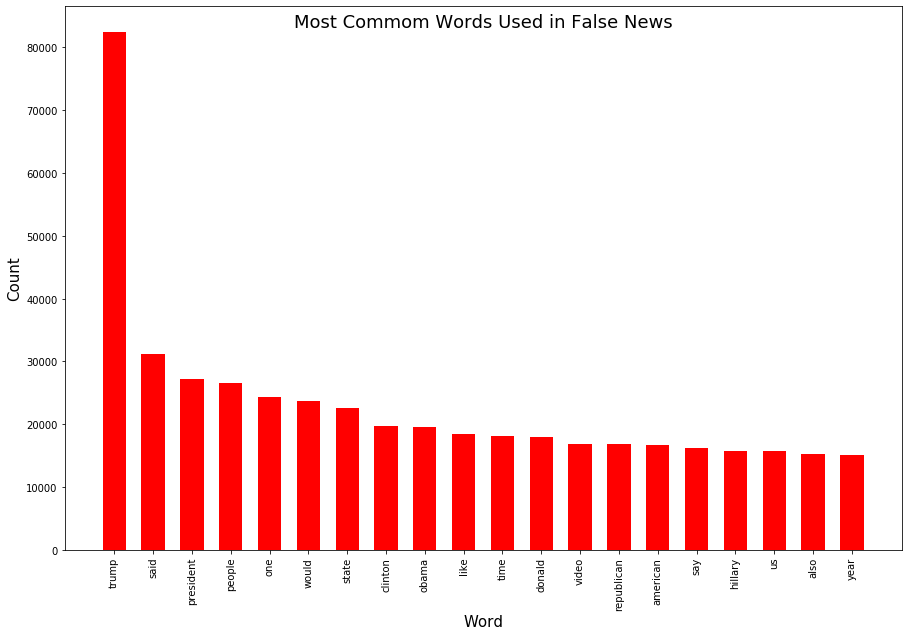

In [288]:
#plot most common words in false news
names, values = zip(*false_word_counts) 

ind = np.arange(len(false_word_counts))
width = 0.6 

fig, ax = plt.subplots(figsize = (15,10))
false_plot = ax.bar(ind, values, width, color='r', align='edge')

plt.title('Most Commom Words Used in False News', x=0.5, y=0.95, fontsize = 18)
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('Word', fontsize = 15)
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)
plt.xticks(rotation='vertical')
plt.show()

### Exploration

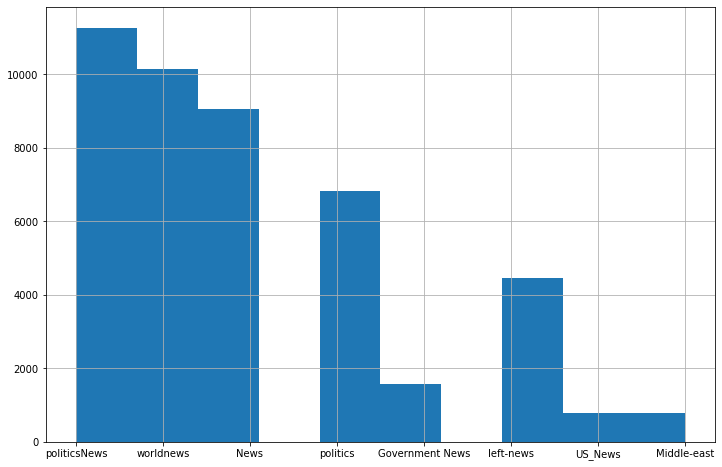

In [299]:
plt.subplots(figsize=(12,8))
df_combined['subject'].hist();

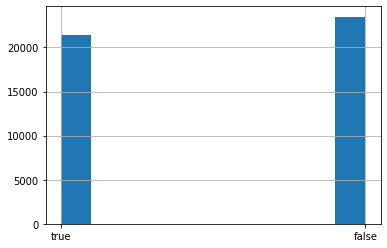

In [290]:
df_combined['target'].hist();

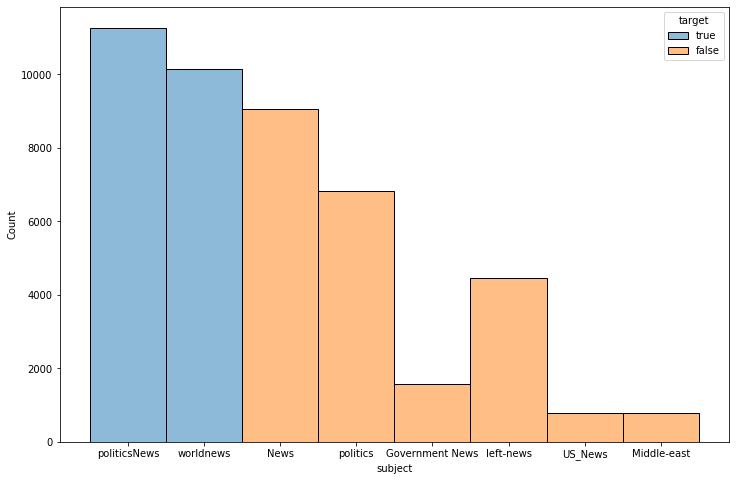

In [291]:
plt.subplots(figsize=(12,8))
sns.histplot(data=df_combined, x='subject', hue='target');

### Train, Test, Split

In [300]:
from sklearn.model_selection import train_test_split

In [303]:
X = df_combined.drop('target', axis=1)
y = df_combined['target']

### Logistic Regression